In [1]:
import pandas as pd
import numpy as np

# Generating mock data
np.random.seed(42)

data = pd.DataFrame({
    'vibration': np.random.normal(0, 1, 5000),
    'temperature': np.random.normal(0, 1, 5000),
    'rotating_speed': np.random.normal(0, 1, 5000),
    'current': np.random.normal(0, 1, 5000),
    'pressure': np.random.normal(0, 1, 5000),
    'flow_rate': np.random.normal(0, 1, 5000),
    'humidity': np.random.normal(0, 1, 5000),
    'operational_hours': np.random.randint(100, 5000, 5000),
    'maintenance': np.random.choice([0, 1], 5000, p=[0.95, 0.05])
})

# Simulating remaining useful life (RUL) based on operational hours and sensor readings
data['RUL'] = 5000 - data['operational_hours'] - (data['vibration'] + data['temperature'] + data['rotating_speed'] + data['current']).cumsum()

# Save to CSV
data.to_csv('machinery_data.csv', index=False)


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('machinery_data.csv')

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Feature selection
features = ['vibration', 'temperature', 'rotating_speed', 'current', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

# Normalize features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Split data for regression and classification
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data[features], data[target_rul], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(data[features], data[target_maintenance], test_size=0.2, random_state=42)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17060\587577897.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [3]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Train regression model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
mse_cv = cross_val_score(reg_model, X_train_reg, y_train_reg, scoring='neg_mean_squared_error', cv=5)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Cross-validated MSE: {-mse_cv.mean()}")
print(f"Regression Model MSE: {mse_reg}")


Cross-validated MSE: 4602.596879285599
Regression Model MSE: 4798.660932681179


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train classification model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate
y_pred_clf = clf_model.predict(X_test_clf)
train_accuracy = round(clf_model.score(X_train_clf,y_train_clf)* 100,2)
accuracy_clf = round( accuracy_score(y_test_clf, y_pred_clf)* 100, 2)
print(f"Training Accuracy: {train_accuracy}","%")
print(f"Classification Model Accuracy Score: {accuracy_clf}","%")
print(classification_report(y_test_clf, y_pred_clf))


Training Accuracy: 100.0 %
Classification Model Accuracy Score: 95.9 %
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       959
           1       0.00      0.00      0.00        41

    accuracy                           0.96      1000
   macro avg       0.48      0.50      0.49      1000
weighted avg       0.92      0.96      0.94      1000



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

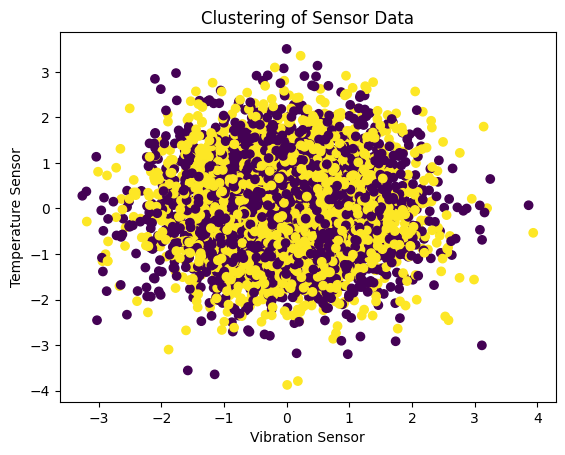

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Train clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Visualize clustering results
plt.scatter(data['vibration'], data['temperature'], c=data['cluster'])
plt.xlabel('Vibration Sensor')
plt.ylabel('Temperature Sensor')
plt.title('Clustering of Sensor Data')
plt.show()


In [6]:
def predict_maintenance(features):
    # Predict RUL
    rul_pred = reg_model.predict([features])
    
    # Predict maintenance status
    maint_pred = clf_model.predict([features])
    
    # Predict cluster (anomaly detection)
    cluster_pred = kmeans.predict([features])
    
    return {
        'RUL Prediction': rul_pred[0],
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if cluster_pred[0] == 1 else 'Normal'
    }

# Example prediction
sample_features = [0.1, 0.2, 0.3, 0.4, 1000]
prediction = predict_maintenance(sample_features)
print(prediction)


{'RUL Prediction': -66.84039732120945, 'Maintenance Prediction': 'Normal', 'Anomaly Detection': 'Normal'}


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
